to aquire af lep b nircam coron data:

1st epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2023-10-11 2023-10-14

2nd epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2023-11-01 2023-11-03

3rd epoch: jwst_download.py -v --instrument nircam --propID 4558 -f uncal.fits --date_select 2024-01-01+

In [1]:
from __future__ import division

# =============================================================================
# IMPORTS
# =============================================================================

import os
import pdb
import sys 

import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import numpy as np

from spaceKLIP import database, coron1pipeline, coron2pipeline, coron3pipeline, pyklippipeline, imagetools, analysistools

# plotting
import matplotlib.pyplot as plt
# plt.style.use('/Users/wbalmer/balmer.mplstyle')
# import seaborn as sb
# sb.set_context('talk')

'/Users/rkane/Documents'

In [2]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = False
aligned = False

blur = True
pad = True
coadd = False
crop = True

data_root='DATA/JWST/NIRCam/04558/F200W/'

if aligned and coadd:
    input_dir = os.path.join(data_root, 'coadded/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = os.path.join(data_root, 'aligned/')#f'./spaceklip/aligned{epoch}/'
    # input_dir = './spaceklip/aligned/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = os.path.join(data_root, 'recentered/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = os.path.join(data_root, 'stage2/')
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    input_dir = os.path.join(data_root, 'uncal/') 
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

# additional PSF references dir
ref_ids = []#['01563','03337','03840','03947','03973','03989','04050','04090'] #'04014',
additionalrefs = []
for i in range(len(ref_ids)):
    input_dir_ref = 'DATA/JWST/NIRCam/%s/F200W/stage2/' % ref_ids[i]
    # read files in additional PSF references input dir
    additionalrefs = additionalrefs + sorted([input_dir_ref + f for f in os.listdir(input_dir_ref) if f.endswith('.fits')])
# list of PSF reference files in main input dir
psffitsfiles = [f for f in fitsfiles if 'jw04558009001' in f]#[f for f in fitsfiles if 'jw04558003001' in f]+[f for f in fitsfiles if 'jw04558006001' in f]+

# global list of ALL files
allpaths = fitsfiles + additionalrefs
# global list of all PSF reference files 
psfpaths = additionalrefs + psffitsfiles


output_dir = data_root

In [29]:
for a in additionalrefs:
    if '_00001_' not in a:
        try: 
            additionalrefs.remove(a)
        finally:
            None
additionalrefs

['DATA/JWST/NIRCam/01563/F444W/stage2/jw01563011001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03337/F444W/stage2/jw03337003001_05101_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03840/F444W/stage2/jw03840003001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03947/F444W/stage2/jw03947003001_03103_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03973/F444W/stage2/jw03973003001_03103_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989002001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989004001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989006001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989008001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989012001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/03989/F444W/stage2/jw03989014001_03106_00001_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/s

In [ ]:
psffitsfiles

In [8]:
additionalrefs

['DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00003_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00004_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00005_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00006_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00007_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00008_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00009_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00003_n

In [35]:
badframes = ['DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00002_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00003_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00004_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00005_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00006_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00007_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00008_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050031001_03106_00009_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050036001_03106_00008_nrcalong_calints.fits',
 'DATA/JWST/NIRCam/04050/F444W/stage2/jw04050036001_03106_00009_nrcalong_calints.fits']
for i in range(len(badframes)):
    print(np.where(psfpaths==badframes[i]))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [10]:
psfpaths

['DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00003_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00004_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00005_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00006_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00007_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00008_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00009_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03108_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03108_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03108_00003_n

In [10]:
#psfpaths[142:149]
#psfpaths = psfpaths[:124]+psfpaths[133:140]+psfpaths[142:]
psfpaths = psfpaths[:133]+psfpaths[142:149]+psfpaths[151:] #f200w
psfpaths#[142]

['DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00003_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00004_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00005_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00006_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00007_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00008_nrca2_calints.fits',
 'DATA/JWST/NIRCam/01563/F200W/stage2/jw01563011001_03106_00009_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/03337/F200W/stage2/jw03337003001_05101_00003_n

In [8]:
for f in psfpaths:
    hdu=pyfits.open(f)[0]
    print(f,'\t'+str(hdu.header['CORON_MASK']))
    #f.close()

KeyError: "Keyword 'CORON_MASK' not found."

In [ ]:
for file in psfpaths:
    data = pyfits.open(file)
    subarray_type = data[0].header['SUBARRAY']
    file_name = data[0].header['FILENAME'] 
    print(file_name, subarray_type)

In [12]:
fitsfiles

['DATA/JWST/NIRCam/04558/F200W/stage2/jw04558007001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558007001_03107_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558008001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558008001_03107_00001_nrca2_calints.fits']

In [11]:
fitsfiles = fitsfiles[-4:]

In [8]:
for f in fitsfiles:
    if f in psfpaths:
        print(f)
        fitsfiles.remove(f)
fitsfiles

['DATA/JWST/NIRCam/04558/F200W/stage2/jw04558001001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558001001_03107_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558002001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558002001_03107_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00001_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00002_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00003_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00004_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00005_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00006_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00007_nrca2_calints.fits',
 'DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00008_n

In [53]:
ref_ids = ['01563','03337','03840','03947','03973','03989','04050','04090']#'04014',
lvls = ['uncal','stage1','stage2']#,'medsub','bpcleaned','nanreplaced','blurred','padded','recentered','aligned']
for r in ref_ids:
    for l in lvls:
        if not os.path.exists('DATA/JWST/NIRCam/'+r+'/F444W/'+l):
            #print('DATA/JWST/NIRCam/%s/F200W/%s does not exist' % (r,l))
            os.mkdir('DATA/JWST/NIRCam/'+r+'/F444W/'+l)
            #print('Made DATA/JWST/NIRCam/%s/F200W/%s' % (r,l))
        #else:
            #print('DATA/JWST/NIRCam/%s/F200W/%s exists' % (r,l))
        for f in os.listdir('DATA/JWST/NIRCam/04558/F444W/%s' % l):
            if r in f:
                os.rename('DATA/JWST/NIRCam/04558/F444W/%s/%s' % (l,f),'DATA/JWST/NIRCam/%s/F444W/%s/%s' % (r,l,f))
        #('DATA/JWST/NIRCam/04558/F200W/'+l)

In [42]:
data_root

'DATA/JWST/NIRCam/04558/F444W/'

In [83]:
for f in os.listdir('DATA/JWST/NIRCam/04558/F200W/stage2'):
    hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
    print(f,'\t'+str(hdu.header['FILTER']))

[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03108_00009_nrca2_calints.fits'>
[py.warnings:WARNING]   hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
[py.warnings:WARNING] 
[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03108_00008_nrca2_calints.fits'>
[py.warnings:WARNING]   hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
[py.warnings:WARNING] 
[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03108_00005_nrca2_calints.fits'>
[py.warnings:WARNING]   hdu=pyfits.open('DAT

jw04558003001_03108_00008_nrca2_calints.fits 	F200W
jw04558003001_03108_00005_nrca2_calints.fits 	F200W
jw04558009001_03108_00001_nrca2_calints.fits 	F200W
jw04558003001_03106_00007_nrca2_calints.fits 	F200W
jw04558006001_03108_00002_nrca2_calints.fits 	F200W
jw04558009001_03106_00003_nrca2_calints.fits 	F200W
jw04558002001_03106_00001_nrca2_calints.fits 	F200W
jw04558003001_03106_00004_nrca2_calints.fits 	F200W
jw04558003001_03106_00009_nrca2_calints.fits 	F200W
jw04558006001_03108_00001_nrca2_calints.fits 	F200W
jw04558009001_03108_00002_nrca2_calints.fits 	F200W
jw04558001001_03107_00001_nrca2_calints.fits 	F200W
jw04558006001_03106_00003_nrca2_calints.fits 	F200W
jw04558003001_03108_00006_nrca2_calints.fits 	F200W
jw04558009001_03108_00004_nrca2_calints.fits 	F200W
jw04558009001_03108_00009_nrca2_calints.fits 	F200W
jw04558006001_03106_00005_nrca2_calints.fits 	F200W
jw04558006001_03106_00008_nrca2_calints.fits 	F200W
jw04558002001_03107_00001_nrca2_calints.fits 	F200W
jw0455800900

[py.warnings:WARNING]   hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
[py.warnings:WARNING] 
[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCam/04558/F200W/stage2/jw04558003001_03106_00003_nrca2_calints.fits'>
[py.warnings:WARNING]   hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
[py.warnings:WARNING] 
[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCam/04558/F200W/stage2/jw04558009001_03106_00007_nrca2_calints.fits'>
[py.warnings:WARNING]   hdu=pyfits.open('DATA/JWST/NIRCam/04558/F200W/stage2/%s' % f)[0]
[py.warnings:WARNING] 
[py.warnings:WARNING] /var/folders/0x/ms4g19v94ks3vl4stzvlgh44000184/T/ipykernel_70359/3387006519.py:2: ResourceWarning: unclosed file <_io.BufferedReader name='DATA/JWST/NIRCa

jw04558003001_03106_00003_nrca2_calints.fits 	F200W
jw04558009001_03106_00007_nrca2_calints.fits 	F200W
jw04558004001_03107_00001_nrca2_calints.fits 	F200W
jw04558003001_03106_00005_nrca2_calints.fits 	F200W
jw04558007001_03107_00001_nrca2_calints.fits 	F200W
jw04558003001_03106_00008_nrca2_calints.fits 	F200W
jw04558009001_03106_00001_nrca2_calints.fits 	F200W
jw04558006001_03106_00002_nrca2_calints.fits 	F200W
jw04558003001_03108_00007_nrca2_calints.fits 	F200W
jw04558004001_03106_00001_nrca2_calints.fits 	F200W
jw04558009001_03108_00003_nrca2_calints.fits 	F200W
jw04558008001_03107_00001_nrca2_calints.fits 	F200W
jw04558006001_03106_00001_nrca2_calints.fits 	F200W
jw04558003001_03108_00009_nrca2_calints.fits 	F200W
jw04558003001_03108_00004_nrca2_calints.fits 	F200W
jw04558009001_03106_00002_nrca2_calints.fits 	F200W
jw04558003001_03106_00006_nrca2_calints.fits 	F200W
jw04558005001_03107_00001_nrca2_calints.fits 	F200W
jw04558006001_03108_00003_nrca2_calints.fits 	F200W


In [16]:
# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=psfpaths,
                             bgpaths=None)

[spaceKLIP.database:INFO] --> Identified 1 concatenation(s)
[spaceKLIP.database:INFO]   --> Concatenation 1: JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
TYPE  EXP_TYPE DATAMODL TELESCOP ... BUNIT       ROLL_REF      BLURFWHM
---- --------- -------- -------- ... ------ ------------------ --------
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  42.24737421207325      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  42.24737416799974      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr  52.24713722329547      nan
 SCI NRC_CORON   STAGE2     JWST ... MJy/sr 52.247135161698395      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.86072157559276      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 48.860718360165585      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.86071974230938      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.86072101637254      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr  48.86072083559891      nan
 REF NRC_CORON   STAGE2     JWST ... MJy/sr 48

In [17]:
Database.summarize()

NIRCAM_F200W_MASK335R
	STAGE2: 22 files;	4 SCI, 18 REF


In [29]:
Database.obs['JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R']['NINTS']

205

In [ ]:
files = list(Database.obs['JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R']['FITSFILE'])
#files[0][-42:]
for f in files:
    hdu = pyfits.open(f[:29]+'uncal/'+f[-42:])[0]
    print(hdu.header['SUBARRAY'])

In [ ]:
# select a subset of obs, usually we are only interested in F200W+F444W

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              # 'JWST_NIRCAM_NRCA2_F210M_MASKRND_MASK210R_SUB640A210R',
              # 'JWST_NIRCAM_NRCA2_F210M_MASKRND_MASK210R_FULL'
              # 'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
              # 'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

In [ ]:
Database.obs['JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R']['TYPE']!='REF'

In [109]:
Database.obs['JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R']['TYPE']

SCI
SCI
SCI
SCI
REF
REF
REF
REF
REF
REF
REF


In [18]:
if not reduced:
    coron1pipeline.run_obs(database=Database,
                           steps={'saturation': {'n_pix_grow_sat': 1,
                                                 'grow_diagonal': False},
                                  'refpix': {'odd_even_columns': True,
                                             'odd_even_rows': True,
                                             'nlower': 4,
                                             'nupper': 4,
                                             'nleft': 4,
                                             'nright': 4,
                                             'nrow_off': 0,
                                             'ncol_off': 0},
                                  'dark_current': {'skip': True},
                                  'persistence': {'skip': True},
                                  'jump': {'rejection_threshold': 4.,
                                           'three_group_rejection_threshold': 4.,
                                           'four_group_rejection_threshold': 4.,
                                           'maximum_cores': 'all'},
                                  'ramp_fit': {'save_calibrated_ramp': False,
                                               'maximum_cores': 'all'}},
                            subdir='stage1')

if not reduced:
    coron2pipeline.run_obs(database=Database,
                           steps={'outlier_detection': {'skip': False}},
                           subdir='stage2')

ImageTools = imagetools.ImageTools(Database)

if not cleanalign:
    ImageTools.update_nircam_centers()

if not cleanalign:
    ImageTools.subtract_median(types=['SCI', 'SCI_TA', 'SCI_BG', 'REF', 'REF_TA', 'REF_BG'],
                                   subdir='medsub')

# Fix bad pixels using custom spaceKLIP routines. Multiple routines can be
# combined in a custom order by joining them with a + sign.
# - bpclean: use sigma clipping to find additional bad pixels.
# - custom: use custom map to find additional bad pixels.
# - timemed: replace pixels which are only bad in some frames with their
#            median value from the good frames.
# - dqmed:   replace bad pixels with the median of surrounding good
#            pixels.
# - medfilt: replace bad pixels with an image plane median filter.
if not cleanalign:
    ImageTools.fix_bad_pixels(method='bpclean+timemed+dqmed+medfilt',
                              bpclean_kwargs={'sigclip': 5,
                                              'shift_x': [-1, 0, 1],
                                              'shift_y': [-1, 0, 1]},
                              custom_kwargs={},
                              timemed_kwargs={},
                              dqmed_kwargs={'shift_x': [-1, 0, 1],
                                            'shift_y': [-1, 0, 1]},
                              medfilt_kwargs={'size': 4},
                              subdir='bpcleaned')

if not cleanalign:
    ImageTools.replace_nans(cval=0.,
                            types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                            subdir='nanreplaced')

if not cleanalign:
    if blur:
        ImageTools.blur_frames()

if not cleanalign:
    if crop:
        ImageTools.crop_frames(npix=10)
    
    if pad:
        ImageTools.pad_frames(
                              npix=[32, 33, 32, 33],
                              # npix=[1, 144, 73, 72], # shortwave
                              types=['SCI', 'SCI_BG', 'REF', 'REF_BG'],
                              cval=0.
                             )
        
if not aligned and coadd:
    ImageTools.coadd_frames()

if not cleanalign:
    ImageTools.recenter_frames(
        spectral_type='F0V',
    )

if not aligned:
    shifts = ImageTools.align_frames(
        subdir='aligned', #f'aligned{epoch}',
        method='fourier',
        align_algo='leastsq',
    )



[spaceKLIP.imagetools:INFO] --> Concatenation JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558007001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (160.03, 160.80), new = (162.76, 168.28)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558007001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (160.03, 160.80), new = (162.76, 168.28)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558008001_03106_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (160.03, 160.80), new = (162.76, 168.28)
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: jw04558008001_03107_00001_nrca2_calints.fits
[spaceKLIP.imagetools:INFO]   --> Update NIRCam coronagraphy centers: old = (160.03, 160.8

[spaceKLIP.imagetools:WARNING]   --> The following frames might not be properly aligned: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
[spaceKLIP.imagetools:WARNING]  25 26 27 28 29 30 31 32 33 34]


[spaceKLIP.imagetools:INFO]   --> Align frames: jw04558007001_03107_00001_nrca2_calints.fits
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -0.19553566  1.        ]
xfirst: 183.0000, xoff_curr_pix: -0.3259, crpix1: 183.0000, xcurrent: 182.6741, xshift: 0.3259
[ 0.3258934  -

In [62]:
shifts[0]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [44]:
!open DATA/JWST/NIRCam/04558/F200W/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_sciref.pdf

The file /Users/rkane/Documents/DATA/JWST/NIRCam/04558/F200W/aligned/JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R_align_sciref.pdf does not exist.


In [ ]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 
# once other image reduction steps are done, run this so that pyklip.parallelized doesn't kill your apple chip

pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                                #'numbasis': [1, 2, 5, 8, 10,],
                               'numbasis': [1, 5, 10, 20, 50, 100, 150, 200, 300, 400, 500],
                               'algo': 'klip'},
                       subdir='klipsub' #f'klipsub{epoch}'
                      )

In [47]:
name = 'DATA/JWST/NIRCam/04558/F200W/run6/aligned/jw04558007001_03106_00001_nrca2_calints_psfmask.fits'
s = name.find('jw0')
name[s+20:s+25]
from spaceKLIP import utils as ut
x = ut.read_msk(name) #data, erro, pxdq, head_pri, head_sci, is2d, imshifts, maskoffs
#arr=x[7]

In [53]:
x.shape

(385, 385)

<Figure size 640x480 with 0 Axes>

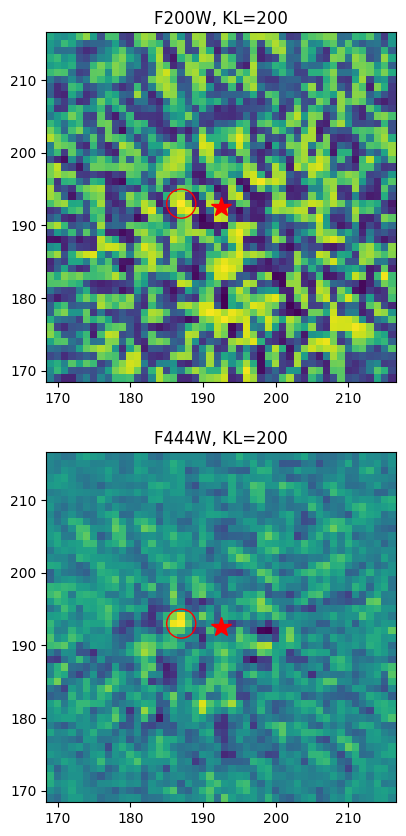

F200W Flux: 89.178203 MJy/Sr
F444W Flux: 11.949706 MJy/Sr


In [125]:
from matplotlib.patches import Circle

klipped_200w = 'DATA/JWST/NIRCam/04558/F200W/klipsub/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits'
klipped_444w = 'DATA/JWST/NIRCam/04558/F444W/run5/klipsub/ADI+RDI_NANNU4_NSUBS3_JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R-KLmodes-all.fits'
data_200w_kl500 = pyfits.open(klipped_200w)[0].data[-4]
data_444w_kl500 = pyfits.open(klipped_444w)[0].data[-4]

plt.clf()

fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(6,10))
ax0 = ax[0]
ax1 = ax[1]
#ax0 = plt.subplot(211)
#ax1 = plt.subplot(212)

aflepa_200 = 0
aflepa_444 = 0
planet_mask = np.ones(data_200w_kl500.shape,dtype=float)
for j in range(data_200w_kl500.shape[0]):
    for i in range(data_200w_kl500.shape[1]):
        if (i-187)**2 + (j-193)**2 < 2**2:
            aflepa_200 += data_200w_kl500[j,i]
            aflepa_444 += data_444w_kl500[j,i]
            planet_mask[j,i] = np.nan

#plt.figure()
ax0.plot([321/2+32],[321/2+32],'r*',markersize=15)
ax0.imshow(np.arcsinh(data_200w_kl500))
circle0 = Circle((187,193),2,color='r',fill=False)
ax0.add_patch(circle0)
ax0.set_xlim(data_200w_kl500.shape[1]*7/16,data_200w_kl500.shape[1]*9/16)
ax0.set_ylim(data_200w_kl500.shape[0]*7/16,data_200w_kl500.shape[0]*9/16)
#ax0.colorbar()
ax0.set_title('F200W, KL=200')


#plt.figure()
ax1.plot([321/2+32],[321/2+32],'r*',markersize=15)
ax1.imshow(np.arcsinh(data_444w_kl500))
circle1 = Circle((187,193),2,color='r',fill=False)
ax1.add_patch(circle1)
ax1.set_xlim(data_444w_kl500.shape[1]*7/16,data_444w_kl500.shape[1]*9/16)
ax1.set_ylim(data_444w_kl500.shape[0]*7/16,data_444w_kl500.shape[0]*9/16)
#ax1.colorbar()
ax1.set_title('F444W, KL=200')

plt.show()
#plt.tight_layout()
print('F200W Flux: %f MJy/Sr' % aflepa_200)
print('F444W Flux: %f MJy/Sr' % aflepa_444)

In [ ]:
f'klipsub{epoch}'

In [ ]:
# # select a subset of obs, usually we are only interested in F200W+F444W

# select_obs = [
#               # 'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
#               # 'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
#               'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
#               ]

# Database.obs = {k:Database.obs[k] for k in select_obs}
# Database.red = {k:Database.red[k] for k in select_obs}

In [ ]:
# Database.red['JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R']

In [ ]:
Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.283, -.074, 1e-4]]

# companion_masks = [[.3173, .0663, 2]]
companion_masks = [[.283, -.074, 2]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = data_root+'vizier_votable.vot' #library_subtracted/

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

In [ ]:
import astropy

# Read in VOT version
vot_version = astropy.table.Table.read(starfile)

# convert from freq to wl, just for plotting below.
vot_version['wavelength'] = (astropy.constants.c /  vot_version['sed_freq']).to(astropy.units.micron)
plt.clf()
plt.figure()
plt.scatter(vot_version['wavelength'], vot_version['sed_flux'], label='vizier_votable.vot', color='C1')

plt.xlabel("Wavelength [micron]")
plt.ylabel("Flux [Jansky]")
plt.xlim(0,8)
plt.legend(fontsize=9)
plt.show()

In [ ]:
Analysis.raw_contrast(starfile,spectral_type='F0V',companions=companions, subdir='rawcon') #library_subtracted/

In [ ]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 

In [ ]:
inj_seps = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
#Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
Analysis.calibrate_contrast(companions=companion_masks,
                            injection_seps=inj_seps,
                            plot_xlim=(0,3),
                            subdir='calcon'#f'calcon{epoch}_noiwa_studentt'
                           )

In [ ]:
import platform
if platform.processor() == 'arm':
    os.environ["OPENBLAS_NUM_THREADS"] = "1"
    os.environ["OMP_NUM_THREADS"] = "1" 
# once other image reduction steps are done, run this so that pyklip.parallelized doesn't kill your apple chip

In [ ]:
Analysis.extract_companions(companions, 
                            starfile, 
                            mstar_err, 
                            klmode=10,
                            spectral_type='F0V', 
                            fitmethod='mcmc',
                            fitkernel='matern32',
                            subdir='companions'
#                             # subdir='companions_e1_nestedfix'
#                             subdir='companions_e3_testiwaoff'
                            )

In [ ]:
crash

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

In [ ]:
# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

In [ ]:
select_obs = [
              # 'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              'JWST_NIRCAM_NRCALONG_F356W_MASKRND_MASK335R_SUB320A335R',
              'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

In [ ]:
ImageTools = imagetools.ImageTools(Database)

In [ ]:
pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e3')

In [ ]:
Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

In [ ]:
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e3')

In [ ]:
# inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
# Analysis.calibrate_contrast(
#                             companions=companions,
#                             injection_seps=inj_seps,
#                             plot_xlim=(0,3),
#                             subdir='calcon_e3'
#                            )

In [ ]:
Analysis.extract_companions(companions, 
                            starfile, 
                            mstar_err, 
                            klmode=100,
                            spectral_type='F8V', 
                            fitmethod='nested',
                            fitkernel='diag',
                            subdir='companions'
                           )

# F200W why do you haate me

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e1/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

ImageTools = imagetools.ImageTools(Database)

pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e1')

Analysis = analysistools.AnalysisTools(Database)

companions = [[.3173, .0663, 1e-4]]
# companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e1')

# inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
# Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
# Analysis.calibrate_contrast(
#                             companions=companions,
#                             injection_seps=inj_seps,
#                             plot_xlim=(0,3),
#                             subdir='calcon_e1'
#                            )

Analysis.extract_companions(companions, 
                            starfile, 
                            mstar_err, 
                            klmode=100,
                            spectral_type='F8V', 
                            fitmethod='nested',
                            fitkernel='diag',
                            subdir='companions_e1'
                           )

In [ ]:
# Set the input and output directories and grab the input FITS files.
reduced = True
cleanalign = True
aligned = True

pad = False
coadd = False
crop = False

if aligned and coadd:
    input_dir = './spaceklip/coadded/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif aligned:
    # input_dir = './spaceklip/aligned/'
    input_dir = './spaceklip/aligned_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif cleanalign:
    input_dir = './spaceklip/nanreplaced/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('calints.fits')])
elif reduced:
    input_dir = './spaceklip/stage2/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])
else:
    # input_dir = './04558/'
    # input_dir = './uncal_e1/'
    # input_dir = './uncal_e2/'
    input_dir = './uncal_e3/'
    fitsfiles = sorted([input_dir + f for f in os.listdir(input_dir) if f.endswith('.fits')])

output_dir = './spaceklip/'

# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

select_obs = [
              'JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
              ]

Database.obs = {k:Database.obs[k] for k in select_obs}

ImageTools = imagetools.ImageTools(Database)

pyklippipeline.run_obs(database=Database,
                       kwargs={'mode': ['ADI+RDI'],
                               'annuli': [4],
                               # 'movement': [0.5],
                               'subsections': [3],
                               'numbasis': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                               'algo': 'klip'},
                       subdir='klipsub_e3')

Analysis = analysistools.AnalysisTools(Database)

# companions = [[.3173, .0663, 1e-4]]
companions = [[.3147, .0531, 1e-4]]

# blob 119.3 and 240.2 pixels
# cen = 320//2
# companions = [[(cen-119.3)*0.063, (240.2-cen)*0.063, 1e-6]]

starfile = './AFLepA.vot'

mstar_err = 0.0
# {'F200W':0.002773909429007033, 
#              'F356W':0.0302418599954501, 
#              'F444W':0.037934753620330594}

Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon_e3')

inj_seps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0]
Analysis.raw_contrast(starfile,spectral_type='F8V',companions=companions, plot_xlim=(0,3), subdir='rawcon')
Analysis.calibrate_contrast(
                            companions=companions,
                            injection_seps=inj_seps,
                            plot_xlim=(0,3),
                            subdir='calcon_e3'
                           )

# Analysis.extract_companions(companions, 
#                             starfile, 
#                             mstar_err, 
#                             klmode=100,
#                             spectral_type='F8V', 
#                             fitmethod='mcmc',
#                             fitkernel='diag',
#                             subdir='companions_e3'
#                            )

In [ ]:
Analysis.raw_contrast(starfile=data_root+'vizier_votable.vot',
                      spectral_type='F8V',
                      companions=[[.3147, .0531, 1e-4]], 
                      plot_xlim=(0,3), 
                      subdir='rawcon')

In [ ]:
Analysis.calibrate_contrast(
                            companions=[[.3147, .0531, 1e-4]],
                            injection_seps=inj_seps,
                            plot_xlim=(0,3),
                            subdir='calcon'
                           )

In [ ]:
from spaceKLIP.mast import query_coron_datasets
a=query_coron_datasets('NIRCam','F200W','MASKA335R',ignore_ta=True,ignore_cal=True,level='uncal')
a.sort('program')
a[72:]

In [ ]:
ff = sorted(['DATA/JWST/NIRCam/04558_1/F200W/uncal/' + f for f in os.listdir('DATA/JWST/NIRCam/04558_1/F200W/uncal/') if f.endswith('.fits')])

db = database.Database(output_dir='DATA/JWST/NIRCam/04558_1/F200W/')
db.read_jwst_s012_data(datapaths=ff,
                             psflibpaths=None,
                             bgpaths=None)

In [ ]:
Database.obs['JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R'][0:13]

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
len(colors)

In [97]:
import pyklip
pyklip.__file__

'/Users/rkane/miniconda3/envs/spaceklip2/lib/python3.11/site-packages/pyklip/__init__.py'

In [101]:
!cd /Users/rkane/miniconda3/envs/spaceklip2/lib/python3.11/site-packages/pyklip#/__init__.py'

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file
